# Datos de cardiotocografía fetal

En la presente actividad basandonos en el dataset *CGT.csv* relacionado con datos del área *medico-biologicas*, el cuál tiene datos médicos de cardiotocografía fetal. 

*La cardiotocografía fetal mide la frecuencia cardíaca del bebé (feto) durante el embarazo o el trabajo de parto y el parto.* 

La información del *dataset* es la siguiente:

* *b* : instante de inicio
* *e* : instante de termino
* *LBE* : valor de referencia (experto médico)
* *LB* : valor de referencia (SisPorto)
* *AC* : aceleraciones (SisPorto)
* *FM* : movimiento fetal (SisPorto)
* *UC* : contracciones uterinas (SisPorto)
* *ASTV* : porcentaje de tiempo con variabilidad anormal a corto plazo (SisPorto)
* *mSTV* : valor medio de la variabilidad a corto plazo (SisPorto)
* *ALTV* : porcentaje de tiempo con variabilidad anormal a largo plazo (SisPorto)
* *mLTV* : valor medio de la variabilidad a largo plazo (SisPorto)
* *DL* : desaceleraciones ligeras
* *DS* : desaceleraciones severas
* *DP* : deceleraciones prolongadas
* *DR* : desaceleraciones repetitivas
* *Width* : anchura del histograma
* *Min* : frecuencia baja del histograma
* *Max* : frecuencia alta del histograma
* *Nmax* : número de picos del histograma
* *Nzeros* : número de ceros del histograma
* *Mode* : modo del histograma
* *Mean* : media del histograma
* *Median* : mediana del histograma
* *Variance* : varianza del histograma
* *Tendency*: tendencia del histograma: -1=asimétrico a la izquierda; 0=simétrico; 1=asimétrico a la derecha
* *A* : sueño tranquilo
* *B* : sueño REM
* *C* : vigilancia tranquila
* *D* : vigilancia activa
* *SH* : patrón de turnos (A o Susp con turnos)
* *AD* : patrón acelerativo/decelerativo (situación de estrés)
* *DE* : patrón desacelerativo (estimulación vagal)
* *LD* : patrón ampliamente desacelerativo
* *FS* : patrón plano-sinusoidal (estado patológico)
* *SUSP* : patrón sospechoso
* *CLASS* : Código de clase (1 a 10) para las clases A a SUSP
* *NSP* : Normal=1; Sospechoso=2; Patológico=3

Fuente: https://www.kaggle.com/code/akshat0007/cardiotocology/input

---

# LIBRERÍAS 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from ipywidgets import interact, fixed, Dropdown, FloatSlider

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# CARGA DEL DATASET

In [2]:
# Cargamos el dataset , utilizando la ruta adecuada
data = pd.read_csv('C:/Users/mgran/Documents/Aprendizaje/Maestría/ASIGNATURAS PRIMER SEMESTRE/Aprendizaje Automático/ACT 3 _ GROUP/CTG.csv')

In [3]:
#Verificación tamaño del dataset
print(f'El dataset CTG.csv tiene el número de registros : {data.shape[0]}')

El dataset CTG.csv tiene el número de registros : 2129


## ANÁLISIS DESCRIPTIVO DE DATOS

In [4]:
#En este análisis no se estara estimando variables que involucren tiempo, fechas etc. entonces se descartaran las variables involucradas.
data=data.drop(["FileName","Date","SegFile","b","e"],axis=1)

## Salida de describe():
Para cada columna numérica, *describe()* devuelve las siguientes métricas:

* *count*:  Número de valores no nulos en la columna.
* *mean*:   Media aritmética de los valores.
* *std*:    Desviación estándar, que mide la dispersión de los datos alrededor de la media.
* *min*:    Valor mínimo en la columna.
* *25%*:    Primer cuartil (percentil 25): el 25% de los datos son menores que este valor.
* *50%*:    Mediana (percentil 50): el valor que divide los datos en dos mitades iguales.
* *75%*:    Tercer cuartil (percentil 75): el 75% de los datos son menores que este valor.
* *max*:    Valor máximo en la columna.

In [5]:
#Resumen estadístico de las variables
data.describe()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2128.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,8.207616,1.576128,0.003759,0.127820,0.0,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.180621,0.272342,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,5.701926,2.517794,0.061213,0.471687,0.0,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.384794,0.445270,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,4.600000,0.000000,0.000000,0.000000,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,7.400000,0.000000,0.000000,0.000000,0.0,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,10.800000,3.000000,0.000000,0.000000,0.0,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,50.700000,16.000000,1.000000,4.000000,0.0,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


### MATRIZ DE CORRELACIÓN ENTRE LAS VARIABLES NÚMERICAS DEL CONJUNTO DE DATOS

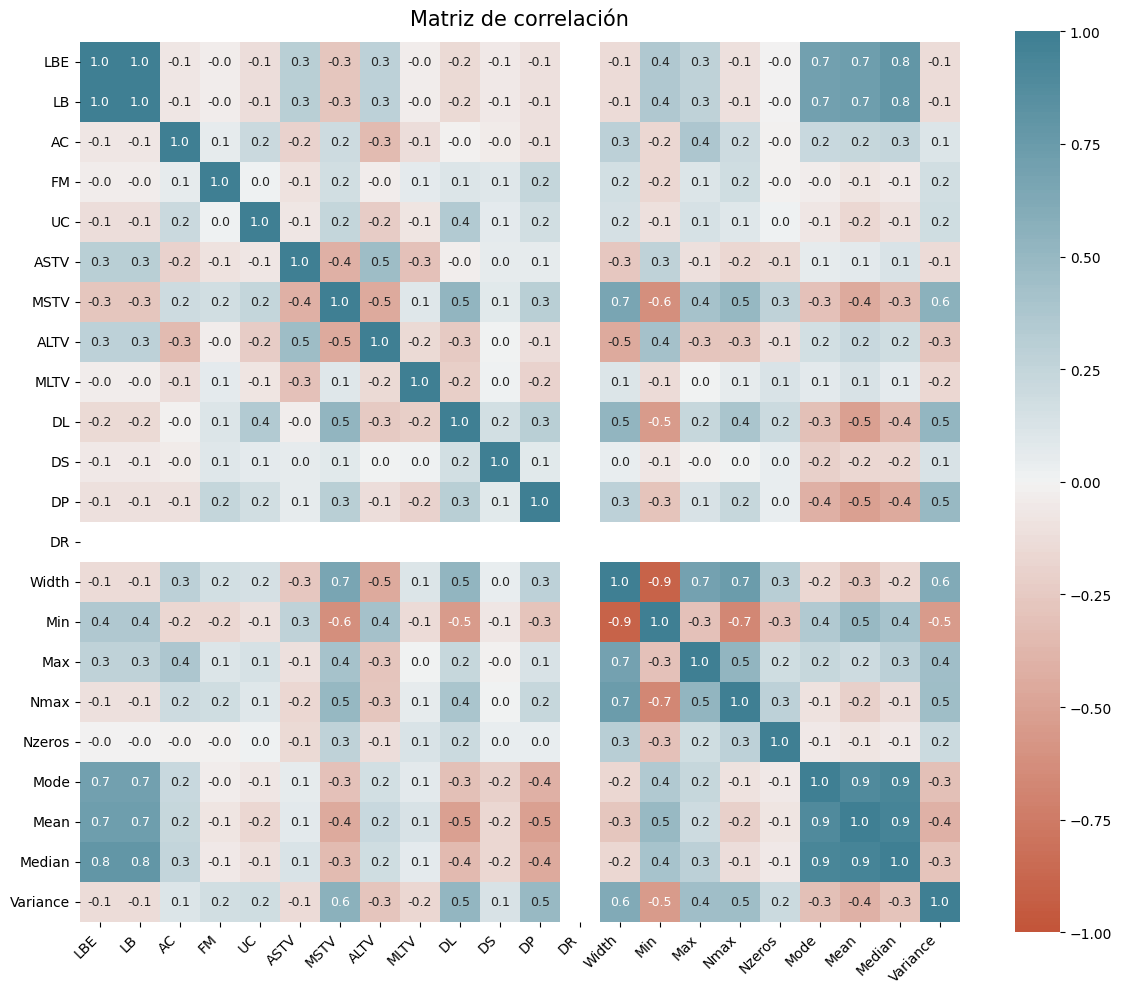

In [6]:
#Vamos a ingresar el código necesario para correlacionar las variable númericas que hemos considerado para el dataset
# Nos apoyaremos en la matriz de correlación

lst_numv = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
            'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', #variables seleccionadas
            'Mean', 'Median', 'Variance']

data_num = data[lst_numv]

corr = data_num.corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),   #configuración del gráfico
    square=True,
    annot = True,
    annot_kws={"size": 9},
    fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),  #configuración de etiquetas
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Matriz de correlación', fontdict={'fontsize':15}, pad=12);

plt.tight_layout() 
plt.show()

Después de realizar el análisis de la matriz de correlación, obtuvimos los siguientes resultados.
* Existe una correlacion positiva de las variables: LBE - LB, LBE - MODE, MEAN - MEDIAN, MSTV - WIDTH, NMAX - VARIANCE, LD - DP, LD - VARIANCE , NSP - LD, FS - CLASS.
* Existe una correlacion negativa de las variables: MIN - MSTV - DL, MEAN -N DL - DP, VARIANCE - MAX, LD - MODE - MEAN, CLASS - A - B.

Entre las acciones a tomar posterior al análisis está la eliminación de variables con valores nulos y alta similitud entre sí.

### DIAGRAMA DE CAJA Y BIGOTES DE LAS VARIABLES NÚMERICAS DEL CONJUNTO DE DATOS

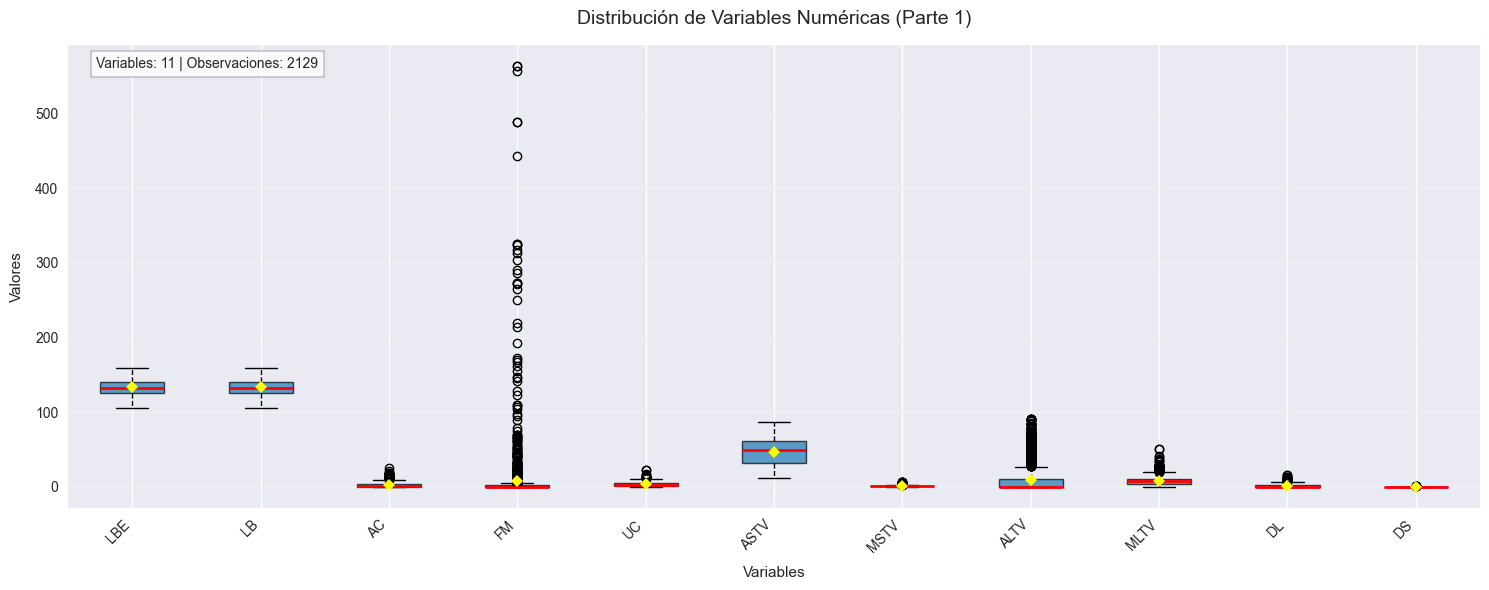

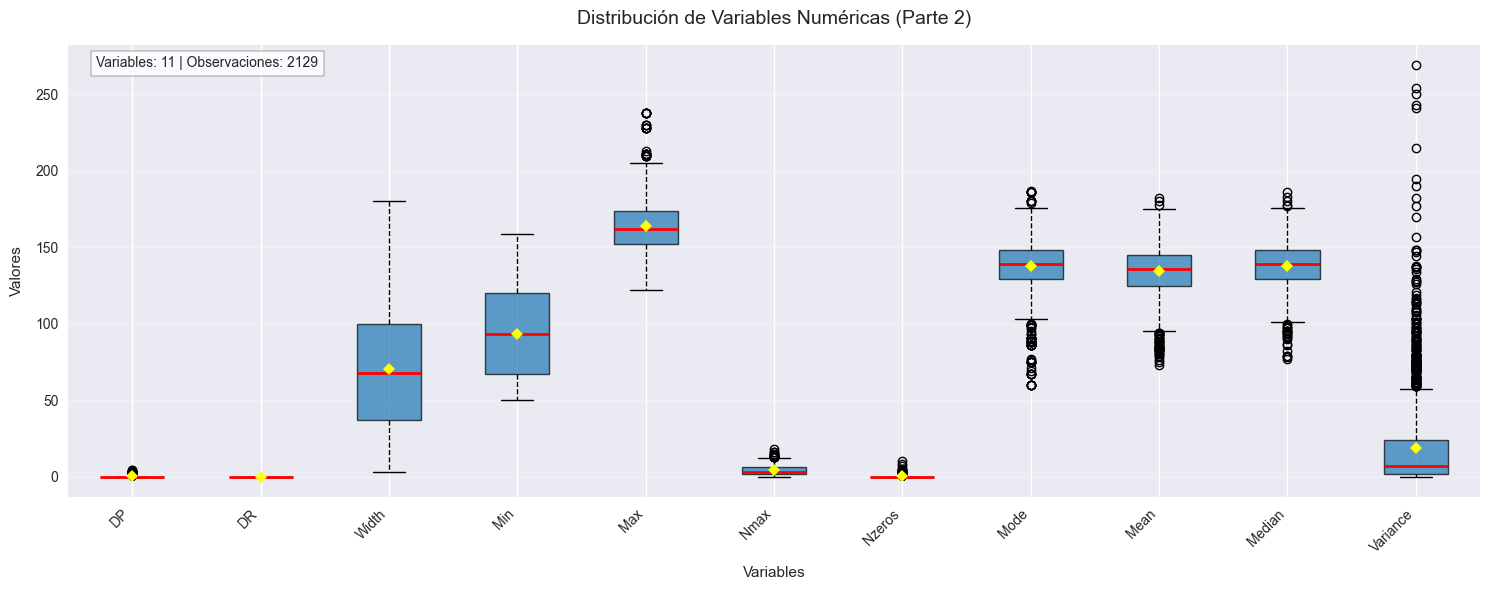

In [7]:
#  DIAGRAMA DE CAJA Y BIGOTES DE LAS VARIABLES NÚMERICAS DEL CONJUNTO DE DATOS SE DIVIDE EN DOS APARTADOS PARA SU MEJOR APRECIACIÓN
mitad = len(lst_numv) // 2
lst_numv_1 = lst_numv[:mitad]   # División de variables númericas para tener dos gráficos independientes y poder apreciarlos mejor.
lst_numv_2 = lst_numv[mitad:]

boxplot_style = {
    'patch_artist': True,
    'boxprops': dict(facecolor='#1f77b4', alpha=0.7),
    'medianprops': dict(color='red', linewidth=2),
    'whiskerprops': dict(linestyle='--'),
    'showmeans': True,
    'meanprops': dict(marker='D', markeredgecolor='black', markerfacecolor='yellow')
}

plt.style.use('seaborn-v0_8')

## Primer gráfico
plt.figure(figsize=(15, 6))
data[lst_numv_1].boxplot(**boxplot_style)
plt.title('Distribución de Variables Numéricas (Parte 1)', pad=15, fontsize=14)
plt.xlabel('Variables', labelpad=8, fontsize=11)
plt.ylabel('Valores', labelpad=8, fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.text(0.02, 0.95, f'Variables: {len(lst_numv_1)} | Observaciones: {data.shape[0]}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

## Segundo gráfico 
plt.figure(figsize=(15, 6))
data[lst_numv_2].boxplot(**boxplot_style)
plt.title('Distribución de Variables Numéricas (Parte 2)', pad=15, fontsize=14)
plt.xlabel('Variables', labelpad=8, fontsize=11)
plt.ylabel('Valores', labelpad=8, fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.text(0.02, 0.95, f'Variables: {len(lst_numv_2)} | Observaciones: {data.shape[0]}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

Variables con Distribución Simétrica (Caja centrada, bigotes equilibrados):

*  AC, MSTV, Min (medianas cerca del centro de la caja).

Variables con Sesgo Positivo (Cola larga hacia valores altos):

* Variable LBE y UC (mediana más cercana a Q1).

Variables con Sesgo Negativo (Cola larga hacia valores bajos):

* MLTV, Mode, Mean, Median (mediana más cercana a Q3).

Presencia de Outliers:

* Variables como la FM, ALTV y DL, Variance muestran múltiples puntos atípicos, sugiriendo posibles errores de medición o datos incongruentes.

Dispersión de Datos:

* Variables con cajas anchas (ASTV) indican alta variabilidad en el 50% central.

* Variables con bigotes largos (ALTV) muestran datos muy dispersos fuera del IQR.

### DISTRIBUCION EN HISTOGRAMAS DE LAS VARIABLES NÚMERICAS DEL CONJUNTO DE DATOS

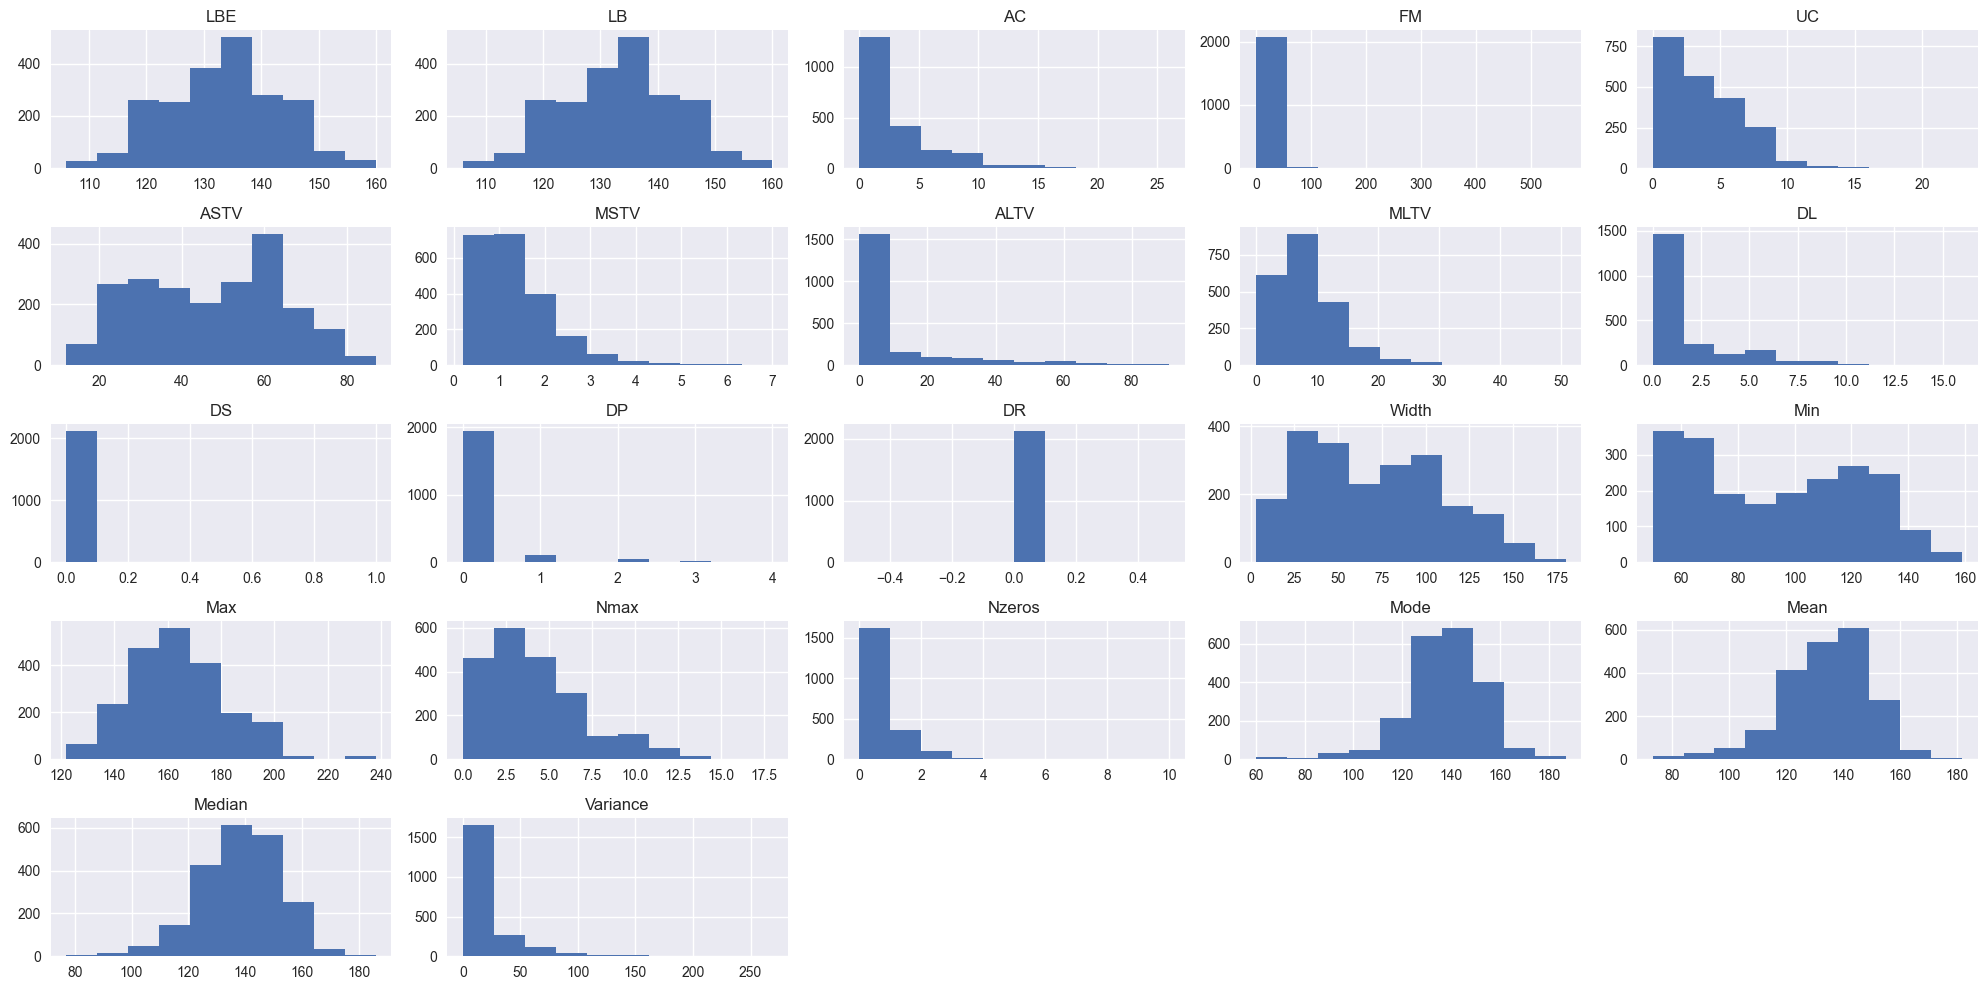

In [8]:
plt.rcParams['figure.figsize'] = [20, 10];
data[lst_numv].hist()
plt.tight_layout() 
plt.show()

Es posible corroborar la información de los diagramas de caja y bigotes, notando las distribución y sesgos de las variables.

### ANÁLISIS DE VARIABLES CATÉGORICAS Y SUS GRÁFICOS DE FRECUENCIA

In [9]:
# Gráficaremos las variables de categoría
lst_cat = {
    'Tendency': 'Tendencia del histograma',
    'A': 'Sueño tranquilo',
    'B': 'Sueño REM',
    'C': 'Vigilancia tranquila',
    'D': 'Vigilancia activa',
    'SH': 'Patrón de cambios',
    'AD': 'Patrón acelerado',
    'DE': 'Patrón desacelerado',
    'LD': 'Patrón predominante',
    'FS': 'Patrón estado patológico',
    'SUSP': 'Patrón sospechoso',
    'CLASS': 'Código de Clase',
    'NSP': 'NSP'
}

@interact
def plot_category(Variable=[(v, k) for k, v in lst_cat.items()]):
    plt.figure(figsize=(12, 6))
    
    if Variable not in data.columns:
        print(f"Error: La columna '{Variable}' no existe en el dataset")
        return
    
    ax = sns.countplot(x=data[Variable], 
                      palette='viridis', 
                      edgecolor='white',
                      linewidth=1.2,
                      saturation=0.9)
    
    for container in ax.containers:
        ax.bar_label(container, 
                    fontsize=10, 
                    padding=3,
                    label_type='edge',
                    fmt='%d')
    
    plt.title(f'Distribución de {lst_cat[Variable]}', 
             fontsize=14, 
             pad=20,
             fontweight='bold')
    
    plt.xlabel(lst_cat[Variable], 
              fontsize=11,
              labelpad=10)
    
    plt.ylabel('Frecuencia', 
              fontsize=11,
              labelpad=10)
    
    plt.xticks(rotation=45, 
              ha='right', 
              fontsize=10,
              rotation_mode='anchor')
    
    plt.yticks(fontsize=10)
    
    sns.despine(left=True)
    plt.grid(axis='y', 
            alpha=0.2,
            linestyle='--')
    
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='Variable', options=(('Tendencia del histograma', 'Tendency'), ('Su…

Al analizar los gráficos de frecuencia, puedo notar que existe un notable desbalance entre las columnas de Desaceleraciones severas [DS] y Vigilancia tranquila [C]; por los demás gráficos, noto una distribución uniforme de los datos en cada una de las columnas.

### TRATAMIENTO DE DATOS NULOS

In [10]:
#Método info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2127 non-null   float64
 4   UC        2127 non-null   float64
 5   ASTV      2127 non-null   float64
 6   MSTV      2127 non-null   float64
 7   ALTV      2127 non-null   float64
 8   MLTV      2127 non-null   float64
 9   DL        2128 non-null   float64
 10  DS        2128 non-null   float64
 11  DP        2128 non-null   float64
 12  DR        2128 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

In [11]:
#Verificación de datos nulos, calculando el porcentaje de valores nulos (missing values) por columna (Método ISNULL)
count_null = data.isnull().sum()
cols_null = count_null[count_null > 0]
cols_null = (cols_null / data.shape[0]) * 100
display(cols_null)

LBE         0.140911
LB          0.140911
AC          0.140911
FM          0.093941
UC          0.093941
ASTV        0.093941
MSTV        0.093941
ALTV        0.093941
MLTV        0.093941
DL          0.046970
DS          0.046970
DP          0.046970
DR          0.046970
Width       0.140911
Min         0.140911
Max         0.140911
Nmax        0.140911
Nzeros      0.140911
Mode        0.140911
Mean        0.140911
Median      0.140911
Variance    0.140911
Tendency    0.140911
A           0.140911
B           0.140911
C           0.140911
D           0.140911
E           0.140911
AD          0.140911
DE          0.140911
LD          0.140911
FS          0.140911
SUSP        0.140911
CLASS       0.140911
NSP         0.140911
dtype: float64

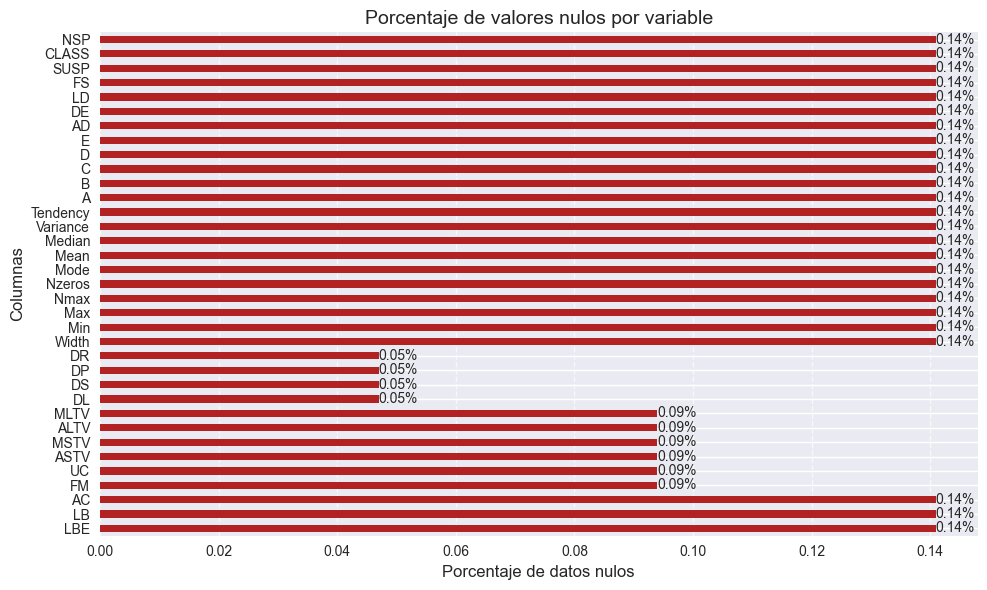

In [12]:
# % DE VALORES NULOS POR VARIABLE
ax = cols_null.plot.barh(color='firebrick', rot=0, figsize=(10, 6))
ax = ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.title('Porcentaje de valores nulos por variable', fontsize=14)
plt.xlabel('Porcentaje de datos nulos', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Analizando la gráfica anterior, podemos ver que el valor de porcentaje (0.14 %) de los registros ausentes en la información general son los de las variables (NSP, CLASS, SUSP, FS, LD, DE, AD, E, D, C, B, A, Tendency, Varianve, Median, Mean, Mode, Nzeros, Nmax, Max, Min, Width, AC, LB, LBE, e, b, SegFile, Date, FileName), seguidos de los de un valor de (0.09 %) de las variables (MLTV, ALTV, MSTV, ASTV, UC, FM), y como con un (0.05 %) de las variables (DR, DP, DS, DL), con lo que podemos concluir que nos enfrentamos a un dataset ligeramente desbalanceado. 

La columna SH no existe en el anterior análisis, por lo tanto no será tomada en cuenta. Y se puede verificar al intentar graficar la variable.

### ELIMINAR (COLUMNAS) / REGISTROS (FILAS) CON VALORES FALTANTES

In [13]:
# Columnas que tienen valor cero
(data==0).sum(axis=0)

LBE            0
LB             0
AC           891
FM          1311
UC           332
ASTV           0
MSTV           0
ALTV        1240
MLTV         137
DL          1232
DS          2120
DP          1949
DR          2128
Width          0
Min            0
Max            0
Nmax         107
Nzeros      1624
Mode           0
Mean           0
Median         0
Variance     187
Tendency    1115
A           1742
B           1547
C           2073
D           2045
E           2054
AD          1794
DE          1874
LD          2019
FS          2057
SUSP        1929
CLASS          0
NSP            0
dtype: int64

In [14]:
# Método DROPNA y se elimina DR al no tener ningun valor
data.drop(["DR"],axis=1, inplace=True)
data.dropna(inplace=True)
# Eliminación si datos duplicados si los hay...
data.drop_duplicates(inplace=True)
print(f'DATASET ACTUALIZADO HASTA ESTE PUNTO {data.shape}')

DATASET ACTUALIZADO HASTA ESTE PUNTO (2114, 34)


## DETECCIÓN DE ANOMALIAS

### MÉTODO INTERCUARTIL

Se emplea el cálculo del rango intercuartil para detectar los outliers. En este caso un valor es outlier si está por debajo del $$Q1 − 1.5 \times IQR$$
o por encima de $$Q3 + 1.5 \times IQR$$

In [15]:
data_out = data.copy()
columns = data_out.drop(columns = ['NSP','DS','DP','Nzeros','Tendency','A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS']).columns

In [16]:
def out_iqr(df , column):
    global lower,upper
    # Calculo de los cuartiles Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    # Calculo del rango intercuantilico, IQR
    IQR = Q3 - Q1
    # Límite para los outliers
    cut_off = IQR * 1.5
    # Calculo de los limites superior e inferior
    lim_inf, lim_sup = Q1 - cut_off, Q3 + cut_off

    print(f'IQR: {IQR:.2f} \t limite inferior: {lim_inf:.2f} \t limite superior {lim_sup:.2f}')
    # Calculo del número de registros por debajo y por encima de los valores, respectivamente
    df1 = df[df[column] > lim_sup]
    df2 = df[df[column] < lim_inf]
    total_outliers =  df1.shape[0] + df2.shape[0]
    return print(f'Número total de outliers detectados: {total_outliers}')

In [17]:
dr_off = "DR"
if dr_off in lst_numv:
    lst_numv.remove(dr_off)

for col in list(data_out[columns].columns):
  print(col)
  out_iqr(data_out[columns], col)
  print(25*'--')
  print(25*'--')

LBE
IQR: 14.00 	 limite inferior: 105.00 	 limite superior 161.00
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
LB
IQR: 14.00 	 limite inferior: 105.00 	 limite superior 161.00
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
AC
IQR: 4.00 	 limite inferior: -6.00 	 limite superior 10.00
Número total de outliers detectados: 83
--------------------------------------------------
--------------------------------------------------
FM
IQR: 2.00 	 limite inferior: -3.00 	 limite superior 5.00
Número total de outliers detectados: 307
--------------------------------------------------
--------------------------------------------------
UC
IQR: 4.00 	 limite inferior: -5.00 	 limite superior 11.00
Número total de outliers detectados: 22
--------------------------------------------------
--------------------------

El método del Rango Intercuartílico (IQR) es una técnica ampliamente utilizada para identificar valores atípicos (outliers) en variables individuales.

### ISOLATION FOREST
Los outliers *(valores atípicos)* en estudios de ISOLATION FOREST pueden indicar errores en los datos, fragmentos inusuales o áreas críticas que requieren atención especial. Posible fuentes de OUTLIERS:

* Fragmentos extremadamente pequeños o grandes: Datos residuales o mega-fragmentos no representativos.

* Datos erróneos: Fallas en clasificación.


In [18]:
# Normalización de datos
data_out[columns] = StandardScaler().fit_transform(data_out[columns])

In [19]:
plt.style.use('seaborn-v0_8')

def plot_outliers(column):
    
    X = data_out[[column]].values
    
    #isolation_forest = IsolationForest(contamination='auto', random_state=42)
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_forest.fit(X)
    
    # Se genera un conjunto de valores en el mismo rango que la variable
    xx = np.linspace(data_out[column].min(), data_out[column].max(), 1000).reshape(-1, 1)
    
    # Calculamos la puntuación de anomalía
    anomaly_score = iso_forest.decision_function(xx)
    outlier = iso_forest.predict(xx)
    
    # Graficamos los resultados apoyandonos en menú interactivo para mejor apreciación
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(xx, anomaly_score, label='Puntuación de anomalía', color='blue', lw=2)
    ax.fill_between(
        xx.ravel(),
        np.min(anomaly_score),
        np.max(anomaly_score),
        where=(outlier == -1),
        color='red',
        alpha=0.3,
        label='Región outlier'
    )
    
    # Datos reales
    data_scores = iso_forest.decision_function(X)
    ax.scatter(
        data_out[column],
        data_scores,
        color='black',
        s=20,
        alpha=0.6,
        label='Data Points'
    )
    
  
    ax.set_title(f'Detección de Outliers en {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Puntuación de anomalía', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


interact(
    plot_outliers,
    column=Dropdown(
        options=lst_numv,
        description='Variable:',
        style={'description_width': 'initial'}
    )
)

interactive(children=(Dropdown(description='Variable:', options=('LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV'…

<function __main__.plot_outliers(column)>

* Para este ejemplo de Isolation Forest he considerado el mismo ajuste del parámetro de contaminación, pero de ser necesario es posible ajustarlo para los falsos positivos, de tal manera obtener mejores resultados.

* Podemos apreciar las anomalías en los extremos derecho e izquierdo de los diagramas. (LBE - LB)

* De igual manera, podemos apreciar que las anomalías son detectadas tanto en valores bajos como en valores altos.

* AC, FM y UC: Existe un umbral notorio de datos nómalos.

### LOCAL OUTLIER FACTOR (LOF)

La puntuación de anomalía de cada muestra se denomina LOCAL OUTLIER FACTOR, el cual mide la desviación local de la densidad de una muestra dada con respecto a sus vecinas. Es local en el sentido de que la puntuación de anomalía depende de lo aislado que esté el objeto con respecto al vecindario circundante. Más concretamente, la localidad viene dada por los *k* vecinos más próximos, cuya distancia se utiliza para estimar la densidad local. Comparando la densidad local de una muestra con las densidades locales de sus vecinos, se pueden identificar muestras que tienen una densidad sustancialmente inferior a la de sus vecinos. Éstas se consideran valores atípicos.

In [20]:
df_2 = data_out[['Mode', 'Mean']]
X_2 = df_2.to_numpy()

In [21]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(df_2)

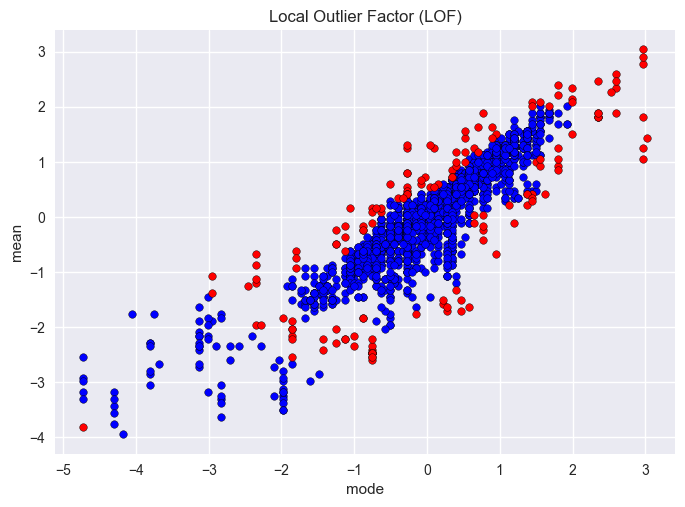

In [22]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X_2[in_mask, 0], X_2[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X_2[out_mask, 0], X_2[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('mode');
plt.ylabel('mean');
plt.show()

LOF esta identificando correctamente los valores lejanos de la tendencia central, debido a que la distribucion del diagrama muestra una mayor cantidad de puntos de color rojo en los extremos.

### OneClassSVM

El OneClassSVM es un algoritmo de aprendizaje automático diseñado para detección de anomalías. A diferencia de Isolation Forest (que aisla outliers), OneClassSVM aprende un límite de decisión alrededor de los datos "normales" y clasifica como outliers los puntos que caen fuera de esta región.

Al hacer predicciones con el modelo, 1 indica que el dato es normal y -1 que es un dato atípico.

In [23]:
one_SVM = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
one_SVM.fit(data_out)
y_pred = one_SVM.predict(data_out)

In [24]:
outliers_values = data_out.iloc[np.where(y_pred == -1)]
print(outliers_values.sample(10))

           LBE        LB        AC        FM        UC      ASTV      MSTV  \
22   -0.538548 -0.538548 -0.766254  5.689059 -0.589674 -0.755099  1.317574   
700  -0.335082 -0.335082 -0.766254  8.537096 -0.238032 -1.046358  0.978118   
650  -1.047211 -1.047211 -0.766254 -0.195094 -1.292959  1.516728 -1.171772   
1793 -1.250676 -1.250676 -0.766254 -0.168225  0.113610  1.108964  0.864966   
49    2.513431  2.513431  0.916427 -0.195094  1.871821 -1.162862  0.412357   
317   1.699570  1.699570 -0.766254  0.073589 -1.292959  1.866240 -1.284924   
48   -1.148943 -1.148943 -0.205360 -0.087621  0.113610 -1.454122  6.409417   
402   1.801303  1.801303 -0.766254 -0.195094 -1.292959  0.060429 -0.832315   
681   0.682244  0.682244  0.075086 -0.114489  0.113610 -0.755099  1.770182   
1679 -2.369735 -2.369735  1.196873 -0.168225  3.630032  0.992460  0.978118   

          ALTV      MLTV        DL   DS   DP     Width       Min       Max  \
22   -0.534246 -0.741126  0.168205  0.0  2.0  1.910571 -1.33941

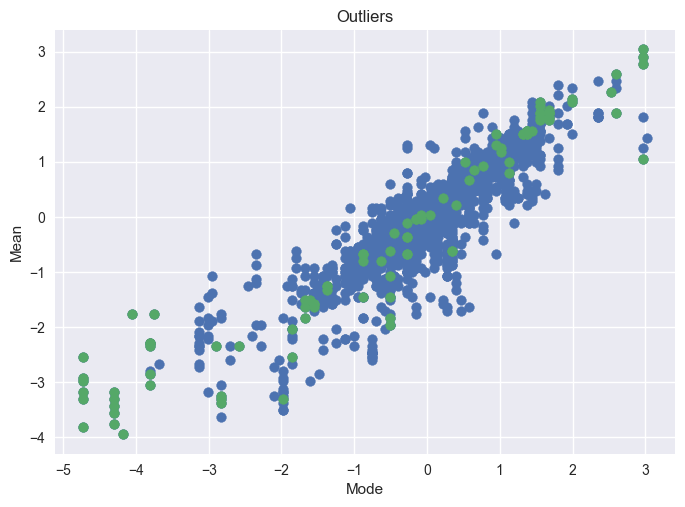

In [25]:
plt.title("Outliers")
# inliers
a = plt.scatter(data_out['Mode'], data_out['Mean'])
# outliers
b = plt.scatter(outliers_values['Mode'], outliers_values['Mean'])
plt.axis('tight')
plt.xlabel('Mode');
plt.ylabel('Mean');
plt.show()

OneClassSVM nos muestra a su salida un diagrama muy similar al obtenido con LOF; por lo tanto, puedo decir que las métricas de identificación de ambos algoritmos son válidas, ya que en ambos casos hay una correcta distribución, además de que los valores verdes están alejados de los valores centrales.

### ALGORITMO DE CLUSTERING 

In [26]:
X = data.drop(columns=['NSP'])  # Variables predictoras
y = data['NSP']                 # Variable objetivo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

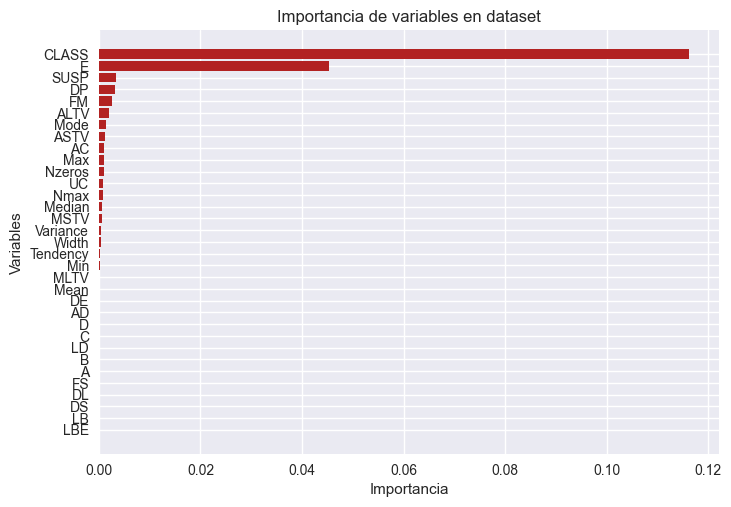

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances_rf = model.feature_importances_
perm_importance = permutation_importance(model, X, y, scoring='accuracy')


features = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color="firebrick")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de variables en dataset")
plt.show()

Utilizamos Random Forest y Permutation Importance para evaluar y visualizar la importancia de las variables en el dataset. 
El largo de la barra muestra su importancia:
* Barras más largas = variables más importantes (CLASS, E , DP)
* Barras más cortas = variables menos relevantes

El valor exacto representa cuánto disminuye la precisión del modelo cuando se permuta esa variable.

In [28]:
df_3 = data_out[['CLASS', 'E','DP']]
X_3 = df_3.to_numpy()

## K-MEANS

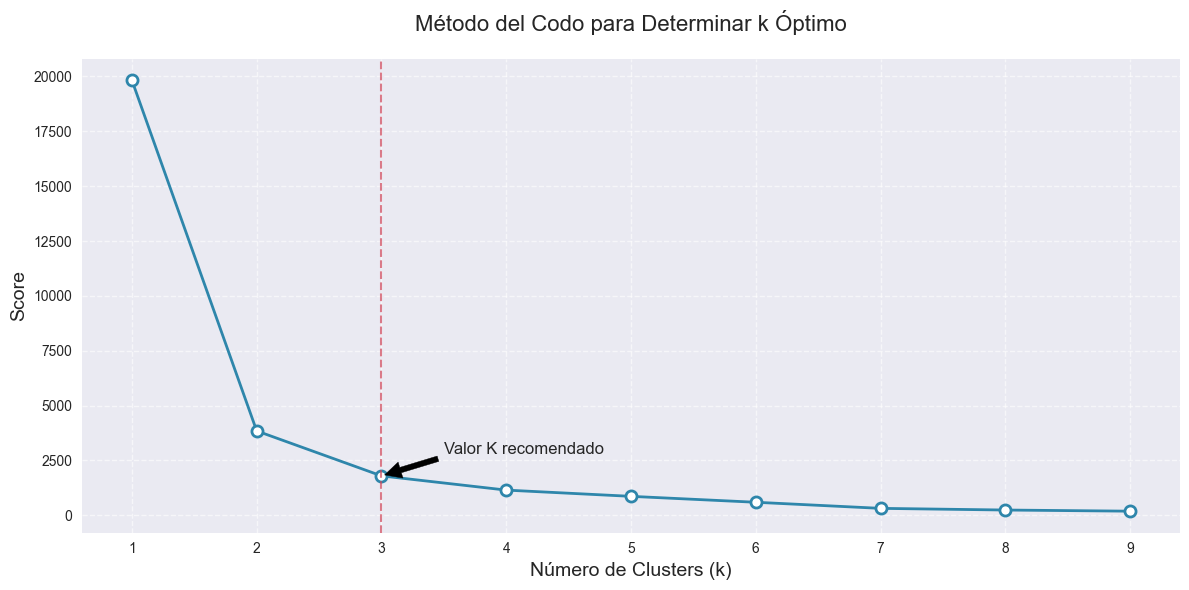

In [29]:
plt.style.use('seaborn-v0_8') 
rcParams['figure.figsize'] = (12, 6)
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
COLOR_PALETTE = '#2E86AB'

Nc = range(1, 10)
kmeans_models = [KMeans(n_clusters=i, random_state=42) for i in Nc]
scores = [model.fit(X_3).inertia_ for model in kmeans_models]  # Usamos inertia_ en lugar de score()

fig, ax = plt.subplots()

# Gráfico principal
ax.plot(Nc, scores, 
        marker='o', 
        markersize=8,
        linewidth=2,
        color=COLOR_PALETTE,
        markerfacecolor='white',
        markeredgewidth=2,
        markeredgecolor=COLOR_PALETTE)

# Línea punteada para resaltar el codo
ax.axvline(x=3, color='#D1495B', linestyle='--', linewidth=1.5, alpha=0.7)  

# Anotaciones
ax.annotate('Valor K recomendado', 
            xy=(3, scores[2]), 
            xytext=(3.5, scores[2] + 1000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)


ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Score')
ax.set_title('Método del Codo para Determinar k Óptimo', pad=20)


ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(np.arange(1, 10, 1))
plt.tight_layout()

plt.show()

In [30]:
kmeans = KMeans(n_clusters=3).fit(X_3)
centroids = kmeans.cluster_centers_

[0 2 2 ... 2 2 1]


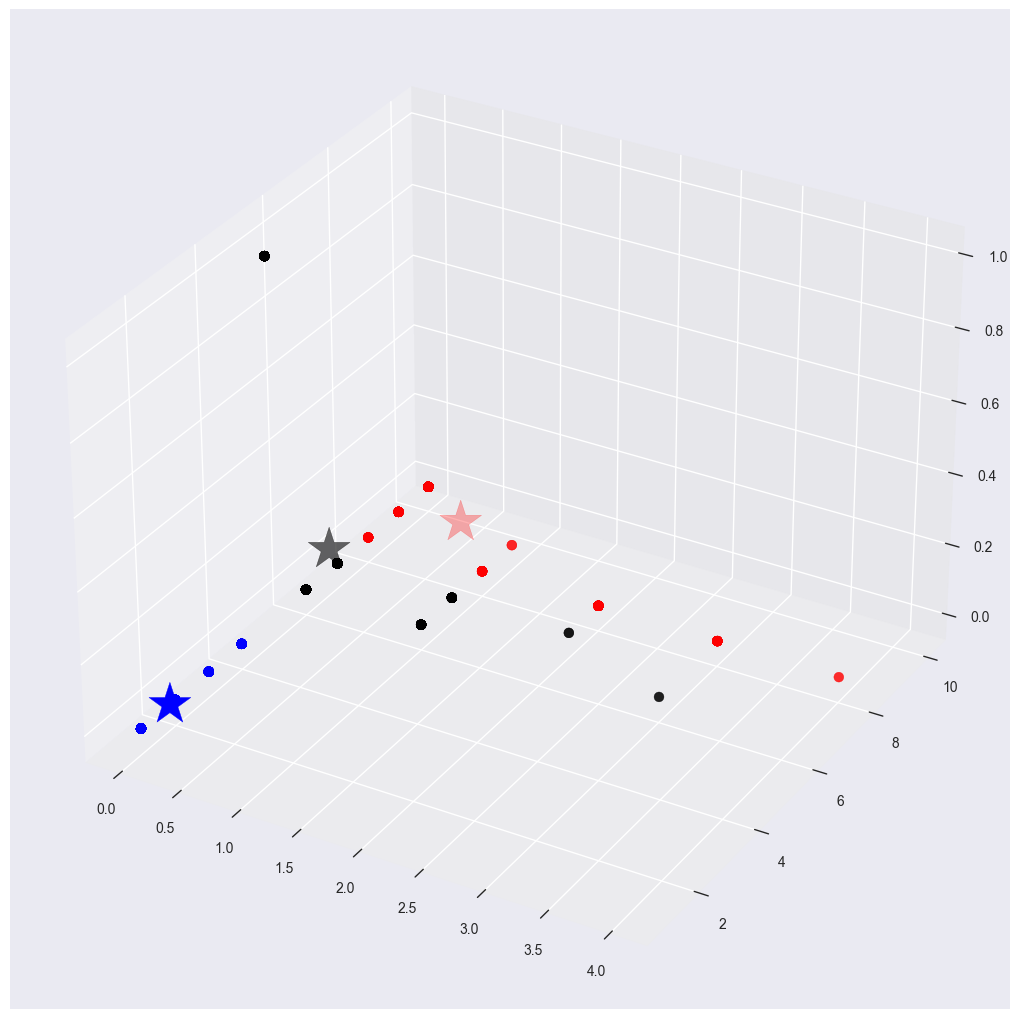

In [31]:
#Graficamos en 3D para ver si es coherente
labels = kmeans.predict(X_3)
print(labels)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red', 'blue', 'black'] #, 'cyan', 'yellow', 'black', 'gray', 'orange', 'pink', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X_3[:, 2], X_3[:, 0], X_3[:, 1], c=asignar, s=50) # Datos
ax.scatter(C[:, 2], C[:, 0], C[:, 1], marker='*', c=colores, s=1000); # Centroides

Se puede presenciar que los clusters están bien distribuidos a lo largo del esquema. El trabajar con anterioridad con Random Forest para buscar las variables de mayor peso ha sido una buena decisión, ya que realicé pruebas con variables aleatorias y el resultado era bastante malo. Puedo explicarlo como que había mala distribución de clusters a lo largo del esquema; por tanto, el modelo no era eficiente.

### DENDOGRAMA

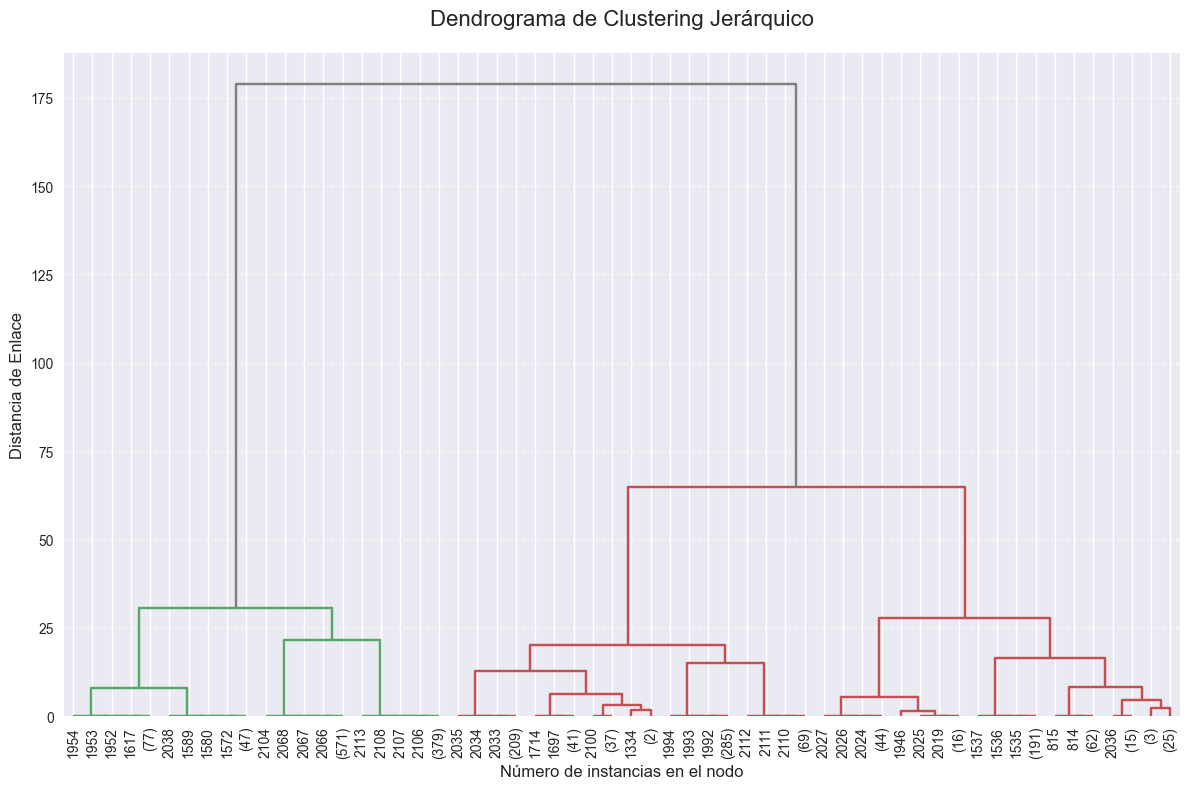

In [32]:
plt.style.use('seaborn-v0_8')
rcParams['figure.figsize'] = (12, 8)
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 12
COLOR_PALETTE = '#2E86AB' 

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Configuración del dendrograma
    dendrogram(linkage_matrix, 
               color_threshold=kwargs.get('color_threshold', 0.7*max(model.distances_)),
               above_threshold_color='grey',
               orientation='top',
               leaf_font_size=10,
               **kwargs)


model = AgglomerativeClustering(distance_threshold=0, 
                               n_clusters=None,
                               linkage='ward')  
model = model.fit(X_3)

fig, ax = plt.subplots()
plot_dendrogram(model, 
               truncate_mode='level', 
               p=6,
               leaf_rotation=90)


ax.set_title('Dendrograma de Clustering Jerárquico', pad=20)
ax.set_xlabel('Número de instancias en el nodo')
ax.set_ylabel('Distancia de Enlace')


ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Como podemos ver, el dendograma nos indica que es viable tener dos clusters principales. Por parte del cluster rojo, que tiene mayor cantidad de ramificaciones, nos explica una estructura compleja y completa para el conjunto de datos, así mismo, en comparación con el verde, que es más sencillo. En este caso la escala de distancias entra a niveles normales, ya que la literatura nos dice que en casos >300 se considera con clústeres mal definidos.

# CONCLUSIONES

### MÉTODO INTERCUARTIL (IQR)

* El IQR es una herramienta versátil y robusta para análisis exploratorios y limpieza de datos, especialmente útil como lo mencionare a continuación de acuerdo a la experiencia en esta práctica:

1. Cuando los datos tienen outliers o son no normales, como en nuestro caso donde el dataset estaba desbalanceado.

2. Si necesitamos una medida de dispersión resistente.

3. Se prioriza la simplicidad y la interpretabilidad, al ser muy fácil de interpretar y de programar.

4. Cuando no se requiere demandar demasiado al equipo de computo, al ser ligero y rápido.

5. Esencial para boxplots y análisis comparativos.

Considero que usar IQR como primer paso en EDA, pero combínalo con otras técnicas como histogramas y tests de normalidad, boxplot.



* Limitaciones o deficiencias:
1. No captura relaciones entre variables (Isolation Forest es mejor para ello).
2. Pérdida de información: Ignora la forma exacta de la distribución (complementar con histogramas, gráficos de densidad, boxplot).

### ISOLATION FOREST

Isolation Forest es una herramienta poderosa para la detección de anomalías en escenarios reales y data sets complejos, combinando velocidad y eficacia. Mencionare las caracteristicas que me parecieron de mayor relevancia:

Más rápido que métodos basados en distancia o densidad (como LOF), especialmente con datasets grandes.

* Efectivo en alta dimensionalidad, funciona muy bien incluso con decenas o cientos de variables.

* Los gráficos fueron bastante explícitos en relación a la distribución de las variables y su relación con las anomalías. En este caso, profundicé en realizar gráficos grandes y detallados para no perder detalle, ya que considero que en esos pequeños detalles un algoritmo distingue al otro. Me encantaría probarlo con un dataset de algún sensor, consideron que podria brindar información crucial en muchos aspectos de la automatización.

* Alta eficiencia computacional, con datasets enormes.

* Capacidad de detectar Outliers en datos complejos.

* Limitaciones o deficiencias:

1. Los gráficos son ligeramente complejos de entender; se necesita profundizar en cada uno de ellos para lograr una abstracción total de los elementos mostrados.

2. El rendimiento y desempeño dependen de tener una buena selección de parámetros.

### LOCAL OUTLIER FACTOR (LOF)

LOF de acuerdo a la varios autores, es bueno para identificar outliers locales (puntos anómalos en contextos específicos), a diferencia de métodos globales como Isolation Forest. Ya que de acuerdo a lo experimentado en esta práctica, aporto lo siguiente:

1. Lo seleccioné porque, a mi parecer, durante las clases logré observar que tiene alta sensibilidad en detectar anomalías, e informándome se menciona que lo realiza comparando la densidad de un punto con la de sus vecinos, por lo tanto es muy útil para clusters irregulares.

2. LOF ≈ 1: Punto similar a sus vecinos. LOF > 1: Posible outlier (cuanto mayor, más anómalo). Por lo tanto, pudimos interpretar el gráfico del análisis.

3. Mostró robustez en datos no lineales.

* Limitaciones o deficiencias:

1. No logra tener la eficiencia que lo caracteriza a datos con ruido, por lo tanto es posible que clasifique los puntos como outliers.

2. Costoso computacionalmente: al ejecutarlo en mi equipo, se tomó más tiempo de lo normal comparado con los otros dos algoritmos (IQR, ISOLATION FOREST).

### K-MEANS

Sin duda fue el algoritmo más simple y rápido de todos, y que fue ideal para nuestro dataset, ya que a pesar de requerir normalizar los datos, funciona bastante bien y los resultados son interpretables. 

Que por supuesto que tiene sus limitaciones, como que es crucial el definir un número de clúster (K) apoyados en el método del codo, así como la selección acertada de la variable objetivo en la cual nos apoyamos utilizando un árbol de decisión, y que mediante las pruebas realizadas y por la premura seleccionamos las 3 adecuadas para este caso. Considero que es bueno ponerlo en duda cuando los clusters tienen formas complejas, o si se tiene mucho ruido o outliers.

### DENDOGRAMA 

De acuerdo a lo visto en esta práctica en el uso de dendograma, es muy explícito, ya que muestra de manera jerárquica el agrupamiento, desde los datos individuales hasta los clústeres finales; la misma estructura de las ramas te va guiando a lo que sugiere y al acomodo de los clústeres. No fue necesario realizar el método del codo ni utilizar una variable K. En nuestro caso sugería dos clusters principales, cosa que en k-means no era posible. Puntos que se unen muy tarde (altas distancias) son potenciales valores atípicos.

* Limitaciones o deficiencias:
1. No escalable con dataset grandes, nuestro dataset no era muy grande y fue complicado adaptarlo.
2. Costo computacional, en mi caso demoro un tiempo en mostrar el resultado.

# BIBLIOGRAFIA 

- Sossa Azuela & Reyes Cortés. (2020). “Inteligencia Artificial Aplicada a Robótica y Automatización”
- González, J. (2022). “Detección de anomalías con Isolation Forest en Python”
- Wes McKinney. (2023). "Python para análisis de datos"